In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
filename = '/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'

n = 2260668 # total lines (approx)
s = 200000  # desired sample size
skip = sorted(random.sample(range(1, n+1), n-s))



df = pd.read_csv(filename, skiprows=skip, low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,67849662,NaN,4225.0,4225.0,4225.0,36 months,14.85,146.16,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68566856,NaN,28800.0,28800.0,28800.0,60 months,11.99,640.50,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68475450,NaN,35000.0,35000.0,35000.0,60 months,12.88,794.21,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68466066,NaN,20200.0,20200.0,20200.0,60 months,18.49,518.35,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200033 entries, 0 to 200032
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 230.4+ MB


(200033, 151)

In [5]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [6]:
print(df.isnull().sum().to_string())

id                                                 0
member_id                                     200033
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                      14697
emp_length                                     12974
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

In [7]:
df = df.dropna(axis=1, thresh=100000)
df.shape

(200033, 107)

In [8]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_year'] = df['issue_d'].dt.year
loan_growth = df['issue_year'].value_counts().sort_index()
loan_growth

issue_year
2007.0       45
2008.0      212
2009.0      478
2010.0     1137
2011.0     2016
2012.0     4791
2013.0    11989
2014.0    20739
2015.0    37419
2016.0    38304
2017.0    39151
2018.0    43748
Name: count, dtype: int64

In [9]:
df = df.dropna(subset=['issue_d'])

df['issue_year'] = df['issue_d'].dt.year.astype(int)

print(df['issue_year'].value_counts().sort_index())

issue_year
2007       45
2008      212
2009      478
2010     1137
2011     2016
2012     4791
2013    11989
2014    20739
2015    37419
2016    38304
2017    39151
2018    43748
Name: count, dtype: int64


In [10]:
# Joint applications
joint_check = df.groupby('issue_year')['application_type'].value_counts().unstack().fillna(0)
joint_check

application_type,Individual,Joint App
issue_year,,
2007,45.0,0.0
2008,212.0,0.0
2009,478.0,0.0
2010,1137.0,0.0
2011,2016.0,0.0
2012,4791.0,0.0
2013,11989.0,0.0
2014,20739.0,0.0
2015,37369.0,50.0


In [11]:
# common reasons people borrow money
purpose_counts = df['purpose'].value_counts()
print("Top 5 Reasons for a Loan:")
purpose_counts.head(5)

Top 5 Reasons for a Loan:


purpose
debt_consolidation    112850
credit_card            45799
home_improvement       13254
other                  12354
major_purchase          4480
Name: count, dtype: int64

In [12]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             95379
Current                                                77551
Charged Off                                            23780
Late (31-120 days)                                      1943
In Grace Period                                          729
Late (16-30 days)                                        385
Does not meet the credit policy. Status:Fully Paid       180
Does not meet the credit policy. Status:Charged Off       75
Default                                                    7
Name: count, dtype: int64

In [13]:
def check_patterns(column_name):
    group = df.groupby(column_name)
    
    summary = group.agg(
        total_people = ('loan_amnt', 'count'),
        avg_loan     = ('loan_amnt', 'mean'),
        avg_int_rate = ('int_rate', 'mean'),
        avg_dti      = ('dti', 'mean'),        # Debt-to-Income ratio
        avg_fico     = ('fico_range_low', 'mean') # Credit Score
    )
    
    # We sort by 'total_people' so the biggest groups stay at the top
    return summary.sort_values(by='total_people', ascending=False)

In [14]:
# how Job Stability affects things
print("--- Employment Length Patterns ---")
print(check_patterns('emp_length'))

# how the 'why' affects the 'risk'
print("\n--- Loan Purpose Patterns ---")
print(check_patterns('purpose'))

# if the bank trusts people with a Mortgage more than Renters
print("\n--- Home Ownership Patterns ---")
print(check_patterns('home_ownership'))

# if 5-year loans (60 months) are riskier than 3-year loans (36 months)
print("\n--- Loan Term Patterns ---")
print(check_patterns('term'))

pd.options.display.float_format = '{:,.2f}'.format

--- Employment Length Patterns ---
            total_people      avg_loan  avg_int_rate    avg_dti    avg_fico
emp_length                                                                 
10+ years          66121  16231.723658     13.038045  18.887083  699.404198
2 years            18212  14399.649956     13.114205  18.168341  697.173841
< 1 year           16792  14752.569676     13.090438  18.936395  699.185922
3 years            15915  14543.034873     13.124618  18.199607  697.505812
1 year             13112  13985.898414     13.121173  18.168698  696.944021
5 years            12482  14939.414757     13.095740  18.487499  698.025957
4 years            12155  14662.258330     13.147988  18.433223  697.779515
6 years             9016  14986.712511     13.165979  18.626355  697.214397
8 years             8146  15331.518537     13.125986  18.705456  698.000246
7 years             8134  15125.061470     13.225014  18.471740  697.784608
9 years             6974  15417.074132     13.195219 

# Phase 2: Key Insights from Borrower Profiles
After analyzing 200,000 loans, three surprising patterns emerged regarding how the bank views risk:

### A. The "Term" Trap
Finding: 60-month loans carry an average interest rate of 15.91%, compared to just 11.95% for 36-month loans.

Analysis: The bank isn't just charging for time; they are pricing in significant risk. Borrowers seeking longer terms are treated as high-risk profiles regardless of their credit score.

### B. The Job Stability Myth
Finding: Borrowers with 10+ years of experience have an average FICO score of 699, which is nearly identical to those with <1 year of experience (699).

Analysis: In peer-to-peer lending, "Time on Job" is a weak predictor of creditworthiness. The bank cares about your payment history, not your resume.

### C. Small Business Risk Premium
Finding: Small business loans have the highest average interest rate (15.38%), even though their FICO scores (704) are higher than debt consolidation borrowers (696).

Analysis: The bank views entrepreneurship as inherently volatile. Even with good credit, small business owners pay a "risk tax."

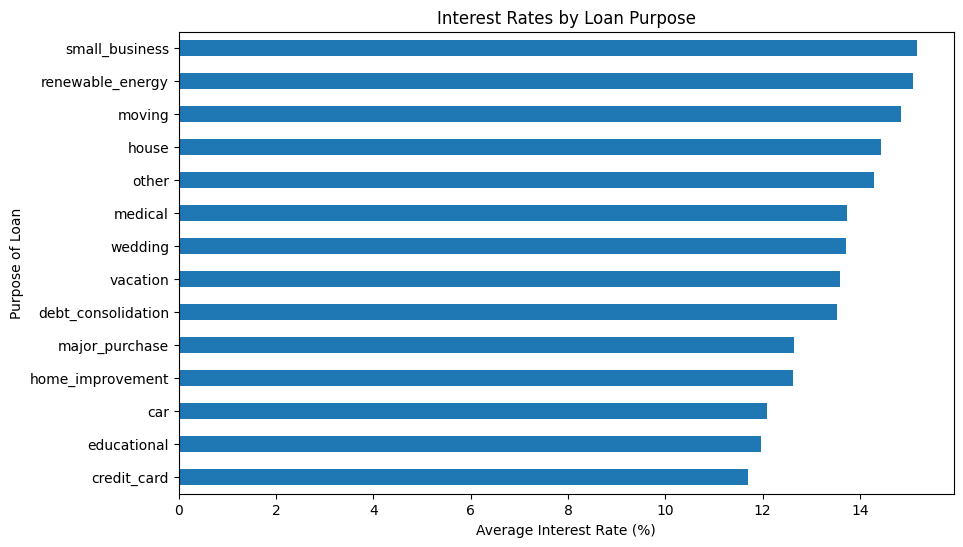

In [15]:
purpose_data = check_patterns('purpose')

purpose_data['avg_int_rate'].sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Interest Rates by Loan Purpose')
plt.xlabel('Average Interest Rate (%)')
plt.ylabel('Purpose of Loan')
plt.show()

In [16]:
print("--- The Joint App Truth ---")
print(check_patterns('application_type'))

--- The Joint App Truth ---
                  total_people  avg_loan  avg_int_rate  avg_dti  avg_fico
application_type                                                         
Individual              189380 14,802.06         13.07    18.12    697.84
Joint App                10649 19,447.60         13.75    31.71    711.02


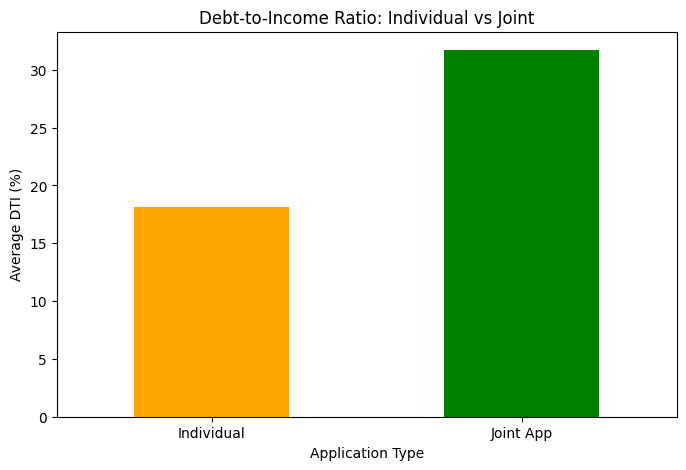

In [17]:
app_type_data = check_patterns('application_type')

app_type_data['avg_dti'].plot(kind='bar', color=['orange', 'green'], figsize=(8,5))

plt.title('Debt-to-Income Ratio: Individual vs Joint')
plt.ylabel('Average DTI (%)')
plt.xlabel('Application Type')
plt.xticks(rotation=0) 

plt.show()

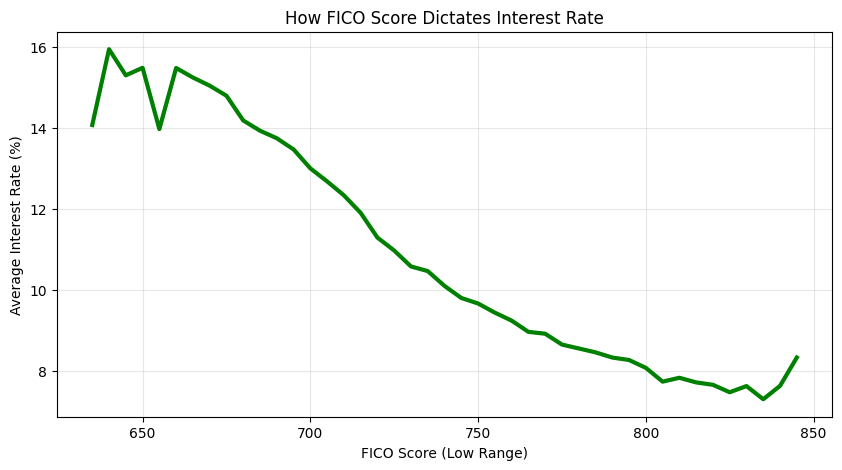

In [18]:
fico_interest = df.groupby('fico_range_low')['int_rate'].mean()

plt.figure(figsize=(10,5))
fico_interest.plot(color='green', linewidth=3)

plt.title('How FICO Score Dictates Interest Rate')
plt.xlabel('FICO Score (Low Range)')
plt.ylabel('Average Interest Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()

# 🏁 Final Project Summary: Phase 1 (EDA)

After analyzing the LendingClub dataset, three main drivers of loan behavior were identified:

* **🛡️ The FICO Gatekeeper:** analysis shows a massive drop in interest rates as credit scores improve. A borrower with a score of **800** pays nearly **half** the interest of someone at **660**. This is the single most important factor for our future model.
* **⚖️ The Debt Trap (Joint vs. Individual):** Joint applicants are not "safer" borrowers. They carry **double the debt (32% DTI)** compared to individuals **(18% DTI)**. This suggests they apply together out of necessity.
* **📈 Strategic Pricing:** The bank prices "Term" and "Purpose" based on volatility. **60-month loans** and **Small Business loans** carry heavy interest premiums, regardless of the borrower's credit score.

---

### **🚀 Next Steps**
I will use these "Golden Features" (**FICO, DTI, Term, and Grade**) to build a classification model in the next notebook to predict the likelihood of loan default.